#VADER SENTIMENT ANALYSIS




What is VADER Sentiment Analysis?
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool specifically designed for social media text. It is able to detect the polarity (positive or negative) and intensity of sentiment in unlabeled data.

### How VADER Works
VADER uses a sentiment lexicon, which is a list of sentiment-related words

1.   List item
2.   List item

*   labeled with their semantic orientation (positive or negative) and intensity.
*   It breaks down the input text into individual words, assigns a score to each word based on the lexicon, and then calculates the overall sentiment score.

### Some key features of VADER:
*   Considers punctuation, capitalization, and modifiers to determine sentiment intensity
*   Automatically removes stop words
Understands non-conventional text like emojis, slang, and internet lingo
Returns 4 sentiment scores: positive, negative, neutral, and compound (overall sentiment)

###Advantages of VADER
*   Fast and intuitive: VADER does not require training a machine learning model, making it quick and transparent
*   Efficient for social media text: VADER is optimized for casual, informal language often found in social media
*   Requires minimal preprocessing: VADER can handle tokenization and stemming automatically

#### Limitations of VADER
*   Struggles with sarcasm and irony
*   May misinterpret negations (e.g. "not bad" classified as negative)
*   Limited support for multilingual analysis
*   Relies on predefined rules and word lists, so it may miss evolving language nuances

## Formula

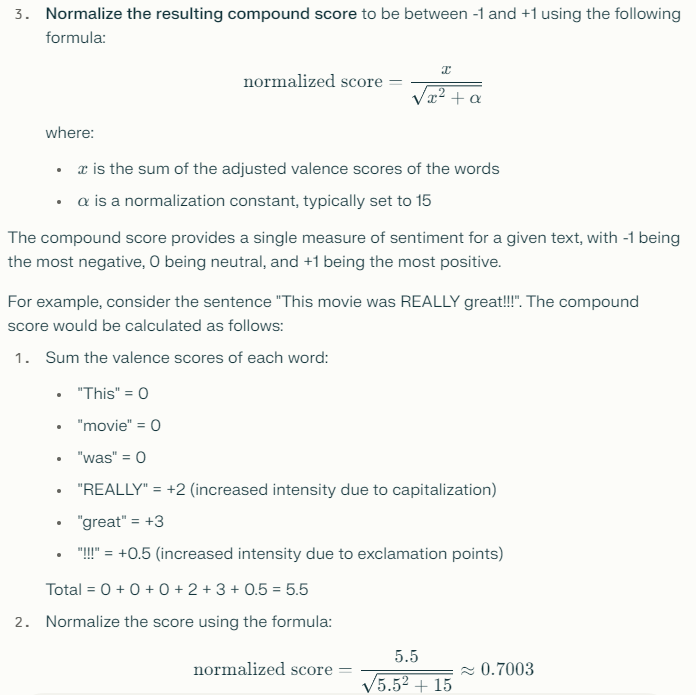

## Example

### Description of the Data set

*   Drug: Entity or medications
*   Sentiment: 1:negative,2:positive,0:neutral


In [ ]:
#importing datasets

import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Defining Sentiment Analysis Function

def sentiment_Vader(text):
    over_all_polarity = sid.polarity_scores(text)
    if over_all_polarity['compound'] >= 0.05:
        return 2
    elif over_all_polarity['compound'] <= -0.05:
        return 1
    else:
        return 0

# initiate SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

# Read file

data_file = pd.read_csv('/content/train_F3WbcTw.csv')
data_file=data_file.sample(1000)
data_file['sentiment_vader'] = data_file['text'].apply(lambda x: sentiment_Vader(x))

# write file
data_file.to_csv('medical_data.csv', index=False)

Download Data set to local Machine

In [ ]:
from google.colab import files
files.download('medical_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data_file.head(2)

,unique_hash,text,drug,sentiment,sentiment_vader
354,d40b4bc71ce80b315b52377a5b815c646219aa8c,"Dr. Steinman said no, it's not worth the risk,...",tysabri,1,2
669,0ed4a15680c76506ce376d15b69a7b961cf6fdda,I have had headaches since I was a small child...,gilenya,1,2


calculate Metrics

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(data_file['sentiment'], data_file['sentiment_vader']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.19      0.40      0.26       150
           2       0.73      0.64      0.68       737

    accuracy                           0.53      1000
   macro avg       0.31      0.35      0.31      1000
weighted avg       0.57      0.53      0.54      1000

